<a href="https://colab.research.google.com/github/khaledkhnissi/khaledkhnissi/blob/main/CIFAR_10_FORMATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

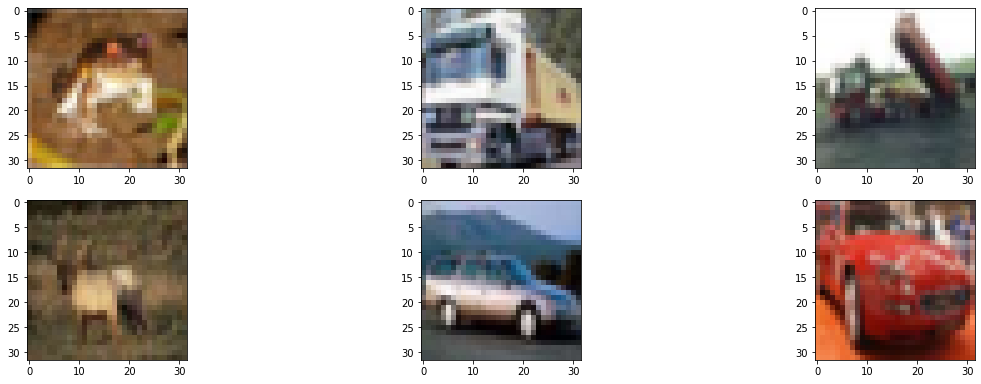

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)              

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

(train_x, train_y), (test_x, test_y) = cifar10.load_data();
n = 6;
plt.figure(figsize=(20, 10));
for i in range(n):
    plt.subplot(330 + 1 + i);
    plt.imshow(train_x[i]);
plt.show();

train_x = train_x.astype('float32');
test_x = test_x.astype('float32');
train_x = train_x / 255.0;
test_x = test_x / 255.0;
train_y = np_utils.to_categorical(train_y);
test_y = np_utils.to_categorical(test_y);
num_classes = test_y.shape[1];

model = Sequential();
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),padding='same', activation='relu', kernel_constraint=maxnorm(3)));
model.add(Dropout(0.2));
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)));
model.add(MaxPooling2D(pool_size=(2, 2)));
model.add(Flatten());
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)));
model.add(Dropout(0.5));
model.add(Dense(num_classes, activation='softmax'));

sgd = SGD(lr=0.01, momentum=0.9, decay=(0.01 / 25), nesterov=False);
model.compile(loss='categorical', optimizer=sgd, metrics=['accuracy']);

model.summary();
